In [170]:
# isso aqui deixará o notebook mais limpo
import warnings

warnings.filterwarnings("ignore")

In [171]:
import pandas as pd

df = pd.read_csv('./dados/covid19_casos_brasil.csv')

df.describe()
#print(df)

,city_ibge_code,epidemiological_week,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,3.520880e+05,353913.000000,3.520880e+05,353913.000000,344064.000000,353913.000000,353913.000000,353913.000000,353913.000000,353913.000000
mean,3.142813e+06,23.132716,1.347397e+05,324.471347,253.029025,0.051116,15.467372,39.052058,10.504983,0.406764
std,1.024140e+06,3.749478,1.242127e+06,4142.775779,507.736947,0.140634,240.762890,26.185864,126.202119,5.666664
min,1.100000e+01,9.000000,8.370000e+02,0.000000,0.002180,0.000000,0.000000,1.000000,-1578.000000,-82.000000
25%,2.411106e+06,21.000000,7.659000e+03,2.000000,20.935020,0.000000,0.000000,17.000000,0.000000,0.000000
50%,3.134004e+06,24.000000,1.705500e+04,11.000000,75.443230,0.000000,0.000000,35.000000,0.000000,0.000000
75%,4.106209e+06,26.000000,3.816600e+04,53.000000,260.831717,0.041700,2.000000,57.000000,2.000000,0.000000
max,5.300108e+06,29.000000,4.591905e+07,371997.000000,13089.322510,1.000000,17848.000000,139.000000,19030.000000,434.000000


1) Apresentar gráfico do crescimento de casos e mortes de Joinville e os das capitais das regiões Sul e Sudeste. Descreva observações sobre estes gráficos.

In [172]:
cities = {
    'Sul': ['Florianópolis', 'Curitiba', 'Porto Alegre', 'Joinville'],
    'Sudeste': ['Vitória', 'Belo Horizonte', 'Rio de Janeiro', 'São Paulo']
}

df_filtered = df[df['city'].isin(cities['Sul'] + cities['Sudeste'])]

df_filtered['date'] = pd.to_datetime(df_filtered['date'])

print(df_filtered)

                  city  city_ibge_code       date  epidemiological_week  \
0            São Paulo       3550308.0 2020-02-25                     9   
2            São Paulo       3550308.0 2020-02-26                     9   
4            São Paulo       3550308.0 2020-02-27                     9   
6            São Paulo       3550308.0 2020-02-28                     9   
8            São Paulo       3550308.0 2020-02-29                     9   
...                ...             ...        ...                   ...   
352063  Rio de Janeiro       3304557.0 2020-07-12                    29   
352605    Porto Alegre       4314902.0 2020-07-12                    29   
352842   Florianópolis       4205407.0 2020-07-12                    29   
352892       Joinville       4209102.0 2020-07-12                    29   
353684       São Paulo       3550308.0 2020-07-12                    29   

        estimated_population_2019  is_last  is_repeated  \
0                      12252023.0    Fal

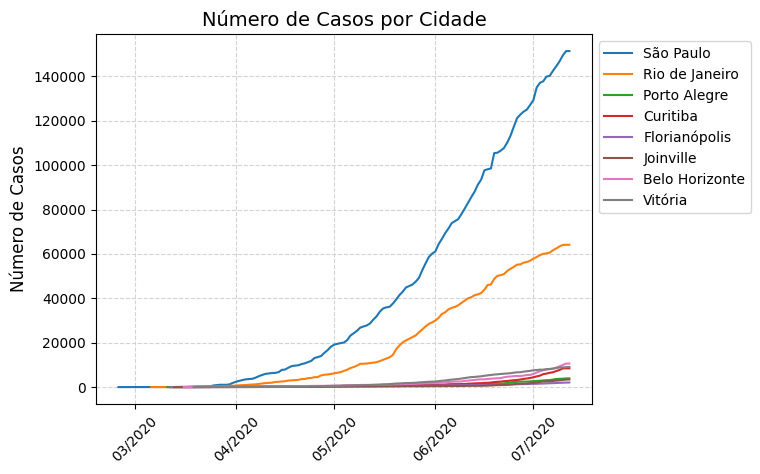

In [173]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates 

#sns.lineplot(data=df_filtered, x='date', y='new_confirmed', hue='city', palette='tab10')
sns.lineplot(data=df_filtered, x='date', y='last_available_confirmed', hue='city', palette='tab10')
plt.xlabel('')
plt.ylabel('Número de Casos')
plt.title('Número de Casos por Cidade')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', color='lightgray')

plt.show()

In [177]:
df_filtered['mês'] = df_filtered['date'].dt.to_period('M')

# df_grouped = df_filtered.groupby(['city', 'mês'], as_index=False)['last_available_confirmed'].sum()
df_grouped = df_filtered.groupby(['city', 'mês'], as_index=False).agg({
    'last_available_confirmed': 'sum',
    'new_deaths': 'sum'
})

print(df_grouped)

              city      mês  last_available_confirmed  new_deaths
0   Belo Horizonte  2020-03                      1163           2
1   Belo Horizonte  2020-04                     11861          15
2   Belo Horizonte  2020-05                     36574          32
3   Belo Horizonte  2020-06                    107012          87
4   Belo Horizonte  2020-07                    100782         113
5         Curitiba  2020-03                       728           0
6         Curitiba  2020-04                      8977          20
7         Curitiba  2020-05                     20266          27
8         Curitiba  2020-06                     63315          98
9         Curitiba  2020-07                     79733          65
10   Florianópolis  2020-03                       331           0
11   Florianópolis  2020-04                      6008           5
12   Florianópolis  2020-05                     15213           2
13   Florianópolis  2020-06                     29967           7
14   Flori

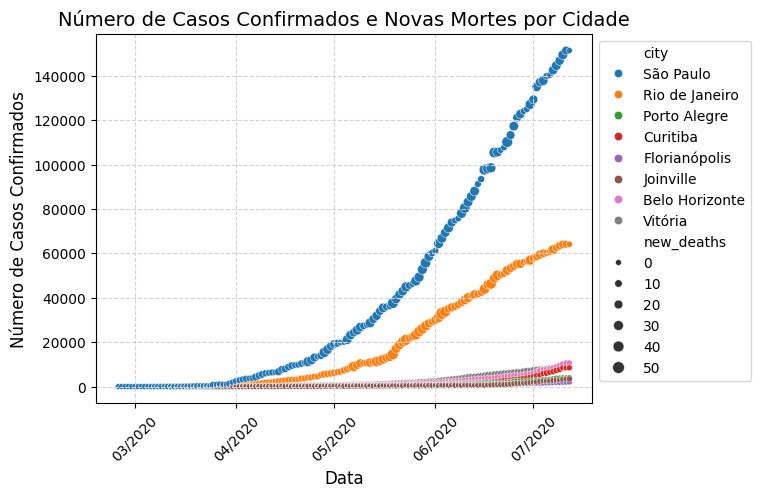

In [198]:
max_new_deaths = df_filtered['new_deaths'].max()
sizes = 50 * (df_filtered['new_deaths'] / max_new_deaths)

sns.scatterplot(data=df_filtered, x='date', y='last_available_confirmed', hue='city', size=sizes, palette='tab10')

plt.xlabel('Data')
plt.ylabel('Número de Casos Confirmados')
plt.title('Número de Casos Confirmados e Novas Mortes por Cidade')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', color='lightgray')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
